# **Loading the Dataset**

In [9]:
## Importing Libraries
from sklearn.datasets import load_digits
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from google.colab import files
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [10]:
df=pd.read_csv('DiseaseX_Detection_Dataset.csv')
#df_test_dataset = pd.read_csv('DiseaseX_Detection_Test.csv')

In [11]:
X=pd.DataFrame(df[df.columns[:-1]])
#X_test_dataset = pd.DataFrame(df_test_dataset)

In [12]:
# X_test_dataset

In [13]:
y=df['Response']

# **Data Visualization and Analysis**

In [ ]:
X.info()

In [15]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X82,X83,X84,X85,X86,X87,X88,X89,X90,Response
0,47.21843,24.89235,15.70033,-12.05588,-18.59509,-13.71663,-15.72416,-3.22798,11.29087,3.68280,...,42.15392,67.14027,49.84003,5.21958,11.56550,62.36397,-2.22447,-179.43095,-35.14595,1
1,43.32832,-0.75920,-41.10614,27.03329,-7.21734,-16.59146,5.02343,-7.59713,-5.18316,-1.62482,...,194.84352,-181.30485,17.47851,-28.82038,-74.58325,-250.62397,9.19734,-59.57419,-42.18186,0
2,47.89838,57.42407,-3.95607,1.38283,4.95182,-20.20633,-0.06557,6.27885,-0.81145,8.53793,...,7.13363,207.26753,151.32900,6.29698,12.65932,76.92116,-4.98013,5.62325,-12.40381,0
3,47.91011,-21.78090,14.55520,-1.90782,21.51567,-14.40354,-1.45493,-11.22573,1.48820,-8.75476,...,72.84185,131.25073,-113.14644,24.85255,16.45688,78.76099,20.32711,141.20491,31.21393,0
4,43.77624,-25.02036,110.36261,37.78546,-7.56661,16.06197,10.91487,-6.93307,-6.13318,-8.31873,...,-30.53142,86.52433,-4.51591,-2.65228,20.18683,-55.48589,3.59819,64.54838,-4.58364,0


In [16]:
df.Response.value_counts()

0    60124
1    49875
Name: Response, dtype: int64

In [17]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X82,X83,X84,X85,X86,X87,X88,X89,X90,Response
count,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,...,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000
mean,43.232634,1.764593,9.144160,1.079497,-7.111106,-9.329027,-2.592898,-1.787686,3.861653,1.854970,...,-74.164584,41.185207,38.199061,0.241528,18.247345,-26.081973,4.515906,18.161538,1.625678,0.453413
std,6.091697,51.864097,35.133630,16.265762,23.061156,12.925541,14.545150,7.939242,10.629991,6.452456,...,175.127542,121.264378,93.537653,15.917842,111.846583,170.878606,13.153380,182.579917,21.879678,0.497827
min,4.418500,-337.092500,-257.525600,-121.600710,-181.953370,-70.693420,-188.214000,-62.412130,-126.479040,-36.620600,...,-2984.920970,-1733.722110,-1495.872230,-198.622200,-2343.894110,-3026.006600,-233.456480,-5000.654060,-230.848180,0.000000
25%,39.775735,-26.028810,-10.924085,-8.568195,-21.359655,-18.272825,-11.004705,-6.450315,-2.238460,-2.439950,...,-138.103025,-21.192715,-4.660905,-6.792235,-30.569565,-101.991320,-2.466970,-60.479085,-8.649055,0.000000
50%,44.056990,8.912540,10.993630,-0.630970,-6.448840,-10.955990,-2.193550,-1.741420,3.915670,1.785540,...,-53.429970,28.329560,33.281290,0.693870,15.776870,-21.511010,3.178860,6.524800,0.239720,0.000000
75%,47.726565,36.862500,30.268100,8.714885,7.419680,-2.186380,6.306850,2.917790,10.113345,6.121435,...,11.972775,88.858570,77.237765,8.181660,67.692765,51.671800,9.980265,84.338660,9.945960,1.000000
max,58.196280,384.065730,268.376010,157.364670,191.615990,119.815590,121.211920,82.942190,146.297950,60.345350,...,2087.990290,2775.334960,1468.295490,198.180750,1348.848890,2635.742650,229.888800,5289.111380,378.662140,1.000000


In [18]:
X.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90
X1,1.000000,0.556077,0.238444,0.009869,-0.286057,-0.271651,0.167107,-0.057725,0.216047,0.104954,...,-0.357907,0.200295,-0.150584,0.013280,0.126446,-0.034195,0.032713,-0.147159,-0.102858,-0.194053
X2,0.556077,1.000000,0.008673,0.104665,-0.197892,-0.117941,0.105927,0.102771,0.120549,0.365575,...,-0.290510,0.060001,-0.165112,0.007943,0.147715,0.042875,-0.017402,-0.019450,-0.128104,-0.168910
X3,0.238444,0.008673,1.000000,0.165673,-0.127329,0.046959,-0.049393,0.089349,0.046137,-0.088985,...,0.075006,0.165470,0.113888,-0.009967,-0.035604,-0.092787,0.086391,-0.054114,-0.097728,0.096678
X4,0.009869,0.104665,0.165673,1.000000,0.035871,0.335543,0.278662,0.027798,-0.032959,0.157792,...,-0.011609,-0.083786,0.047975,0.054593,-0.071304,0.039861,0.024066,0.250020,0.036440,0.004613
X5,-0.286057,-0.197892,-0.127329,0.035871,1.000000,0.023634,-0.095261,-0.015477,-0.219486,-0.122898,...,0.040649,-0.091320,0.036202,-0.003319,0.014221,0.006812,0.003833,-0.015723,0.001459,0.034562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X86,-0.034195,0.042875,-0.092787,0.039861,0.006812,0.218740,-0.020072,-0.036001,0.014960,0.026616,...,-0.016644,-0.135541,0.074127,0.084494,0.049895,1.000000,0.008296,0.179263,0.162529,-0.011846
X87,0.032713,-0.017402,0.086391,0.024066,0.003833,-0.037481,0.006496,0.017107,0.065121,0.019695,...,0.056825,-0.013240,0.144944,0.330502,-0.001912,0.008296,1.000000,0.019685,0.134323,0.282163
X88,-0.147159,-0.019450,-0.054114,0.250020,-0.015723,0.146718,0.070894,0.059118,-0.010454,0.042885,...,0.087211,0.025249,0.274430,0.005158,-0.217672,0.179263,0.019685,1.000000,0.066972,0.228262
X89,-0.102858,-0.128104,-0.097728,0.036440,0.001459,-0.016426,0.079645,-0.001083,0.005342,-0.024947,...,0.100389,-0.051193,0.052702,0.076798,-0.034569,0.162529,0.134323,0.066972,1.000000,0.209986


In [19]:
X.corr().style.background_gradient(cmap='Blues')

In [20]:
# Finding the Predictive variables which between 0.87 to -0.87
X_corr = X.corr()
for row in X_corr.index:
    for col in X_corr.columns:
      if(row!=col):
        value = X_corr.loc[row, col]
        if value > 0.87 or value < -0.87:
            print(f"Value {value} in cell ({row}, {col}) is outside the range.")

Value 0.8708579756758176 in cell (X20, X22) is outside the range.
Value 0.8708579756758176 in cell (X22, X20) is outside the range.


<AxesSubplot:xlabel='X20', ylabel='X22'>

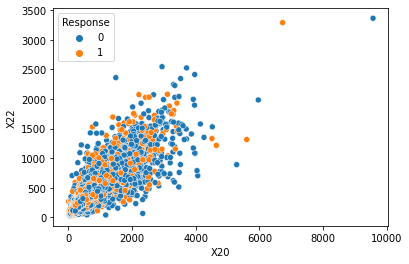

In [21]:
sns.scatterplot(data=df,x='X20',y='X22',hue='Response')

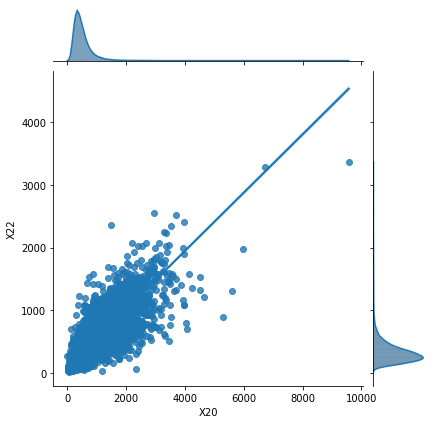

In [22]:
sns.jointplot(x = 'X20', y = 'X22', data = df, kind = 'reg')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='X20'>

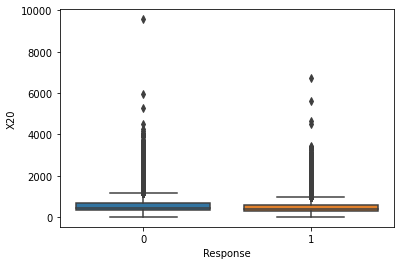

In [23]:
sns.boxplot(df['Response'],df['X20'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='X22'>

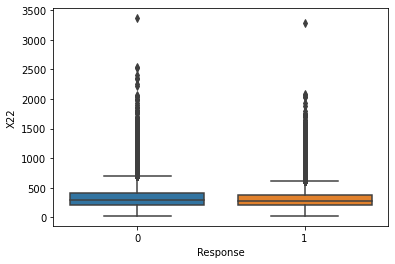

In [24]:
sns.boxplot(df['Response'],df['X22'])

**Data Exploration using visualization**

<AxesSubplot:xlabel='Response', ylabel='Response'>

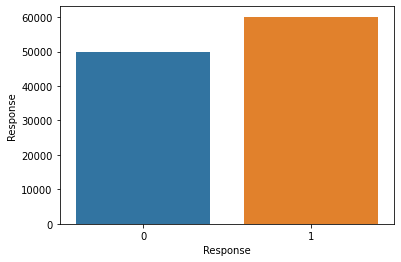

In [25]:
#Finding the number of O's and number of 1's
sns.barplot(x='Response',y=df.Response.value_counts(),data=df)

# **Data Preprocessing and Data Splitting**

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Building the Logistic Regression Model**

In [124]:
import statsmodels.api as sm
logit = sm.Logit(y_train,X_train)
logit_model=logit.fit()

Optimization terminated successfully.
         Current function value: 0.614814
         Iterations 6


In [125]:
final_logit = sm.Logit(y_train,sm.add_constant(X_train)).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.557549
         Iterations 6


In [126]:
y_pred_df = pd.DataFrame({"actual":y_test,
                          "predicted_prob":final_logit.predict(sm.add_constant(X_test))})

In [127]:
y_pred_df.sample(10,random_state=42)

,actual,predicted_prob
82284,0,0.591028
67276,1,0.565206
97574,0,0.152381
3617,0,0.521529
105911,1,0.362007
24998,1,0.405420
94904,1,0.825448
94694,0,0.255012
22654,0,0.184423
29068,1,0.806687


In [128]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_df['predicted_prob'])
thresholds

array([1.99999647e+00, 9.99996471e-01, 9.99685541e-01, ...,
       5.54444429e-05, 7.98832809e-06, 5.06831887e-06])

In [129]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(y_pred_df.predicted_prob>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
5400,0.471486,0.736667
5401,0.471414,0.736667
5402,0.471374,0.736667
5404,0.471283,0.736667
5403,0.471352,0.736636


In [137]:
#Setting the threshold 
y_pred_df['predicted_value_1'] = y_pred_df.predicted_prob.map(lambda x: 1 if x>0.797 else 0)

In [135]:
#Setting the threshold 
y_pred_df['predicted_value_2'] = y_pred_df.predicted_prob.map(lambda x: 1 if x>0.471486 else 0)

In [138]:
y_pred_df.sample(10,random_state=42)

,actual,predicted_prob,predicted,predicted_value_2,predicted_value_1
82284,0,0.591028,0,1,0
67276,1,0.565206,0,1,0
97574,0,0.152381,0,0,0
3617,0,0.521529,0,1,0
105911,1,0.362007,0,0,0
24998,1,0.405420,0,0,0
94904,1,0.825448,1,1,1
94694,0,0.255012,0,0,0
22654,0,0.184423,0,0,0
29068,1,0.806687,1,1,1


In [40]:
# np.savetxt('output.csv',[p for p in zip(y_pred_test_dataset.predicted)],delimiter=',',fmt='%s')

# **Building Tree Based Model**

In [111]:
#Taking the Decision Tree for depth of 8 and 10 and fitting the Model
from sklearn.tree import DecisionTreeClassifier
model_DTC_1 = DecisionTreeClassifier(max_depth=8)
model_DTC_1.fit(X_train,y_train)
model_DTC_2 = DecisionTreeClassifier(max_depth=10)
model_DTC_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [112]:
y_hat_1=model_DTC_1.predict(X_test)
y_hat_2=model_DTC_2.predict(X_test)

In [113]:
y_hat_1

array([1, 1, 0, ..., 0, 0, 0])

# **Measuring Metrics for Decision Tree Model**

In [114]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_hat_1)

array([[13342,  4687],
       [ 5468,  9503]])

In [115]:
confusion_matrix(y_test,y_hat_2)

array([[12893,  5136],
       [ 5172,  9799]])

In [116]:
accuracy_score(y_test,y_hat_1)

0.6922727272727273

In [117]:
accuracy_score(y_test,y_hat_2)

0.6876363636363636

<AxesSubplot:>

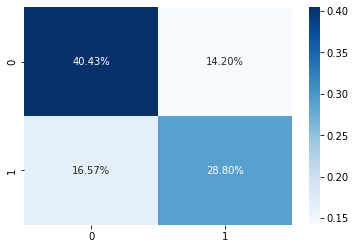

In [118]:
#Confusion Metric for Depth 8
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_hat_1)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='Blues')

<AxesSubplot:>

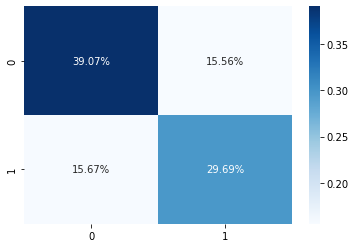

In [119]:
#Confusion Metric for Depth of 10
cf_matrix = confusion_matrix(y_test,y_hat_2)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='Blues')

# **Measuring the Logit Reg Model**

In [55]:
auc_score=metrics.roc_auc_score(y_pred_df.actual,y_pred_df.predicted_prob)
auc_score

0.797411820191472

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_df['predicted'])

0.7357878787878788

In [139]:
confusion_matrix(y_pred_df['actual'],y_pred_df['predicted_value_1'])

array([[17363,   666],
       [11914,  3057]])

In [140]:
confusion_matrix(y_pred_df['actual'],y_pred_df['predicted_value_2'])

array([[14049,  3980],
       [ 4710, 10261]])

<AxesSubplot:>

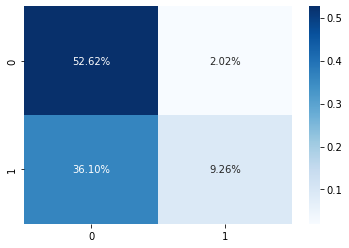

In [141]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cf_matrix = confusion_matrix(y_pred_df['actual'],y_pred_df['predicted_value_1'])
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='Blues')

<AxesSubplot:>

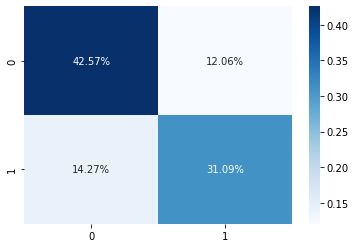

In [143]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cf_matrix = confusion_matrix(y_pred_df['actual'],y_pred_df['predicted_value_2'])
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='Blues')

In [50]:
print(metrics.classification_report(y_pred_df.actual,y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76     18029
           1       0.71      0.70      0.71     14971

    accuracy                           0.74     33000
   macro avg       0.73      0.73      0.73     33000
weighted avg       0.74      0.74      0.74     33000



 ROC Curve

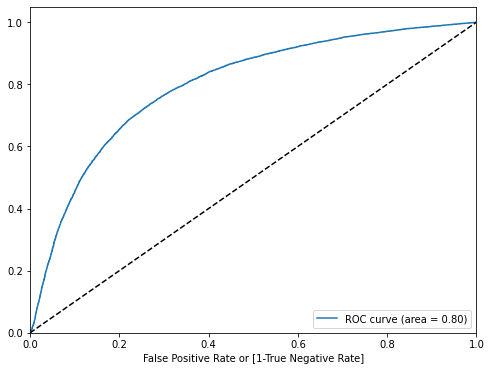

In [134]:
def draw_roc(actual, probs):
  fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
  auc_score=metrics.roc_auc_score(actual,probs)
  plt.figure(figsize=(8,6))
  plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score)
  plt.plot([0,1],[0,1],'k--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.05])
  plt.xlabel('False Positive Rate or [1-True Negative Rate]')
  plt.legend(loc="lower right")
  plt.show()
  return fpr,tpr,thresholds

fpr,tpr,thresholds = draw_roc(y_pred_df.actual,y_pred_df.predicted_prob)